In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def gen_sine_wave(n=1000, s=1, amp=1, wl=1, ns_mean=0, ns_var=1, x_range=(0,1), r_rad=0, swap_axis=False):
    # n - number of points to generate
    # s - slope gradient of wave
    # amp - amplitude of wave
    # wl - wavelength equivalent parameter
    # ns_mean, ns_var - noise mean and variance
    x = np.random.rand(n)
    x = np.interp(x, (x.min(), x.max()), x_range)
    epsilon = ns_mean + ns_var * np.random.randn(n)
    # apply to formula [y = s*x + mag*sin(wl*x)]
    y = s*x + amp*np.sin(wl*x) + epsilon
    # create rotation matrix
    rM = np.array((np.cos(r_rad), -np.sin(r_rad), np.sin(r_rad), np.cos(r_rad))).reshape((-1, 2))
    t = (x, y)
    output = np.matmul(rM, t)
    if (swap_axis==True):
        output = output[[1, 0],:]
    return(output)
    

In [10]:
t = gen_sine_wave(s=0.75, amp=1.25, wl=4, x_range=(-2, 2))

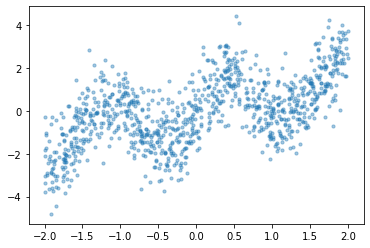

In [11]:
plt.scatter(t[0], t[1], alpha=0.4, s=10)

plt.savefig('wave_data_gen.png')

In [5]:
X = np.array(t).T

In [6]:
f = open("wave_data_gen.csv", "w+")

In [7]:
X = pd.DataFrame(X, columns=('x', 'y'))

In [8]:
X.to_csv("wave_data_gen.csv", index=False)

In [9]:
f.close()